In [2]:
%matplotlib inline
import notebook_utils
notebook_utils.prepare_notebook_path()

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from music_emotions_intel import feature_extraction, configs, io, cache

annotations_df = io.load_annotations()

audio_data = cache.load_audio_files_cache(configs.CACHE_AUDIO_CLIPS)
tempos = []
tempos_ids = []
for id_ in audio_data:
    tempos.append(audio_data[id_].tempo)
    tempos_ids.append(id_)

tempo_dict = {'ID': np.array(tempos_ids, dtype='int'), 'TEMPO': np.array(tempos, dtype='float16')}
tempo_df = pd.DataFrame(tempo_dict)
tempo_df = tempo_df.set_index('ID')

data = annotations_df.join(tempo_df, how='left')
data.head()

,AROUSAL,VALENCE,TEMPO
ID,,,
2,3.1,3.0,136.0000
3,3.5,3.3,95.6875
4,5.7,5.5,112.3750
5,4.4,5.3,101.3125
7,5.8,6.4,120.1875


Gráfco de dispersão de Arousal x Valence x Tempo

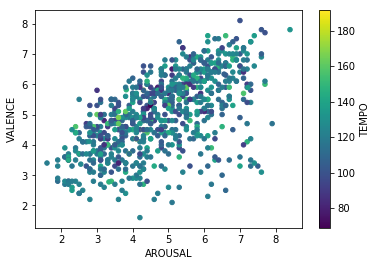

In [8]:
data.plot.scatter(x='AROUSAL', y='VALENCE', c='TEMPO', colormap='viridis', sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x27c9a3358>]], dtype=object)

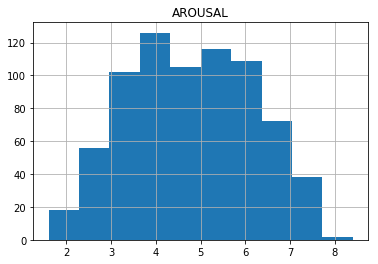

In [9]:
data.hist(column='AROUSAL')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x27ca69ef0>]], dtype=object)

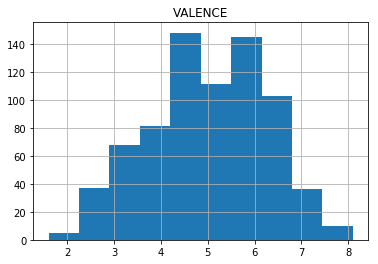

In [10]:
data.hist(column='VALENCE')

In [27]:
yhat = cache.load_yhat_cache();
y = cache.load_y_cache();
y_yhat = y.join(yhat, rsuffix='hat_')
yhat.head()

,ID,yhat_arousal,yhat_valence
0,2,4.923925,5.204108
1,3,4.923925,5.204108
2,4,4.923925,5.204108
3,5,4.923925,5.204108
4,7,4.923925,5.204108


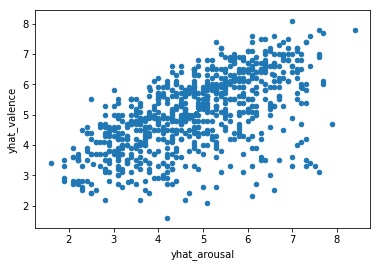

In [28]:
ax = y.plot.scatter(x='AROUSAL', y='VALENCE')
yhat.plot.scatter(x='yhat_arousal', y='yhat_valence', ax=ax)